# Методы машинного обучения без учителя и предварительная обработка данных

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from pandas.plotting import scatter_matrix
import mglearn
plt.rc('font', family='Verdana')

## Предварительная обработка и массштабирование

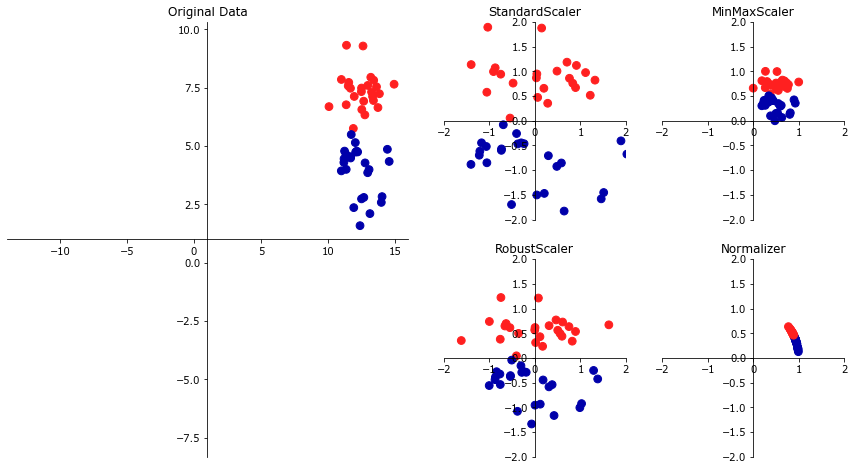

In [19]:
mglearn.plots.plot_scaling()

### Виды предварительной обработки

+ StandartScaler -  гарантирует, что для каждого признака среднее значени будет равно 0, а дисперсия будет равна 1.
+ RobustScaler - имеет тот же принцип, но использует медиану и квартили, что позволяет игнорировать выбросы. 
+ MinMaxScaler - сдвигает данные таким образом чтобы все признаки уместилисть в диапозоне от 0 до 1.
+ Normalizer - масштабирует каждую точку данных таким образом, чтобы вектор признаков имел евклидову длину 1.

### Применение преобразований данных 

In [20]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                    cancer.target, random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [22]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [23]:
# преобразовываем данные
X_train_scaled = scaler.transform(X_train)
# печатаем значения признаков в обучающем наборе до и после
# масштабирования
print("форма преобразованого массива: {}".format(
       X_train_scaled.shape))
print("min значение признака до масштабирования:\n {}".format(
       X_train.min(axis=0)))
print("max значение признака до масштабирования:\n {}".format(
       X_train.max(axis=0)))
print("min значение признака после масштабирования:\n {}".format(
       X_train_scaled.min(axis=0)))
print("max значение признака после масштабирования:\n {}".format(
       X_train_scaled.max(axis=0)))

форма преобразованого массива: (426, 30)
min значение признака до масштабирования:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
max значение признака до масштабирования:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
min значение признака после масштабирования:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
max значение признака после масштабирования:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.

In [24]:
# преобразовываем тестовые данные
X_test_scaled = scaler.transform(X_test)
# печатаем значения признаков в тестовом наборе после
# масштабирования
print("min значение признака после масштабирования:\n {}".format(
       X_test_scaled.min(axis=0)))
print("max значение признака после масштабирования:\n {}".format(
       X_test_scaled.max(axis=0)))

min значение признака после масштабирования:
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
max значение признака после масштабирования:
 [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


### Масштабирование обучающего и тестового наборов одинаковым способом

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

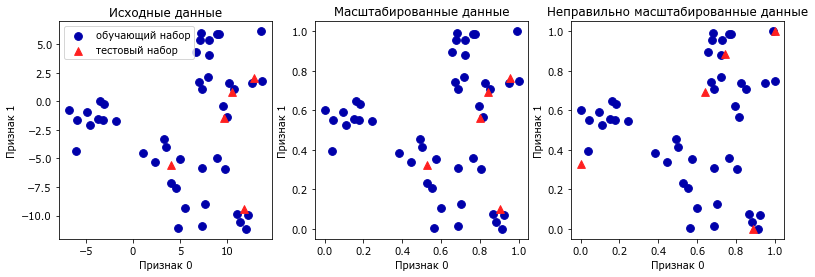

In [25]:
from sklearn.datasets import make_blobs
# создаем синтетические данные
X, _ = make_blobs(n_samples=50, centers=5, random_state=4,
                  cluster_std=2)
# разбиваем их на обучающий и тестовый наборы
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# размещаем на графике обучающий и тестовый наборы
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
               c=mglearn.cm2(0), label="обучающий набор", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
               c=mglearn.cm2(1), label="тестовый набор", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Исходные данные")

# масштабируем данные с помощью MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# визуализируем правильно масштабированные данные
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
               c=mglearn.cm2(0), label="Обучающий набор", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1],
            marker='^', c=mglearn.cm2(1), label="Тестовый набор", s=60)
axes[1].set_title("Масштабированные данные")

# масштабируем тестовый набор, отдельно,
# чтобы в тестовом наборе min значение каждого признака было
# равно 0, a max значение каждого призанка равнялось 1.
# так делать нельзя
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# визуализируем неправильно масштабированне данные
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
               c=mglearn.cm2(0), label="Обучающий набор", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
            marker='^', c=mglearn.cm2(1), label="Тестовый набор", s=60)
axes[2].set_title("Неправильно масштабированные данные")
for ax in axes:
    ax.set_xlabel("Признак 0")
    ax.set_ylabel("Признак 1")
    

### Быстрые и эффективные альтернативные способы подгонки моделей

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# последовательно вызываем методы fit и transform (используем 
# цепочку методов)
X_scaled = scaler.fit(X).transform(X)
# тот же самый результат, но более эфективный способ вычислений
X_scaled_d = scaler.fit_transform(X)

## Влияние предварительной обработки на машиннное обучение с учителем

In [27]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                    cancer.target, random_state=0)
svm = SVC(C=100)
svm.fit(X_train, y_train)
print("Правильность при тестовом наборе: {:.2f}".format(
        svm.score(X_test, y_test)))

Правильность при тестовом наборе: 0.63


C:\Users\Denis\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [28]:
# предварительная обработка с помощью масштабирования 0-1
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# построение SVM-модели на масштабированных обучающих данных
svm.fit(X_train_scaled, y_train)

# оценка правильности для масштабированного тестового набора
print("Правильность на масшабированном тестовом наборе: {:.2f}".
     format(svm.score(X_test_scaled, y_test)))

Правильность на масшабированном тестовом наборе: 0.97


C:\Users\Denis\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [29]:
# предврительная обработка с помощью масштабирования
# нулевым средним и единичной дисперсией
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# построение SVM-модели на масштабированных обучающих данных
svm.fit(X_train_scaled, y_train)

# оценка правильности для масштабированного тестового набора
print("Правильность на масшабированном тестовом наборе: {:.2f}".
     format(svm.score(X_test_scaled, y_test)))

Правильность на масшабированном тестовом наборе: 0.96


# Снижение размерности, выделение признаков и множественное обучение

## Анализ главных компонент(PCA)

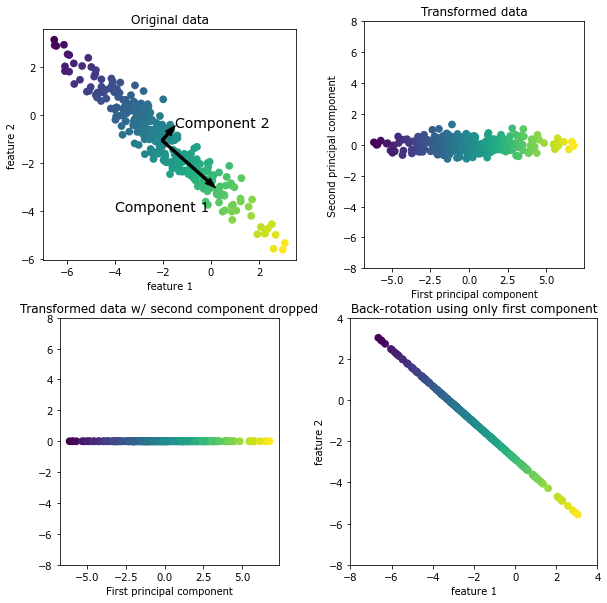

In [30]:
mglearn.plots.plot_pca_illustration()

### Применение метода РСА к набору данных cancer для визуализации

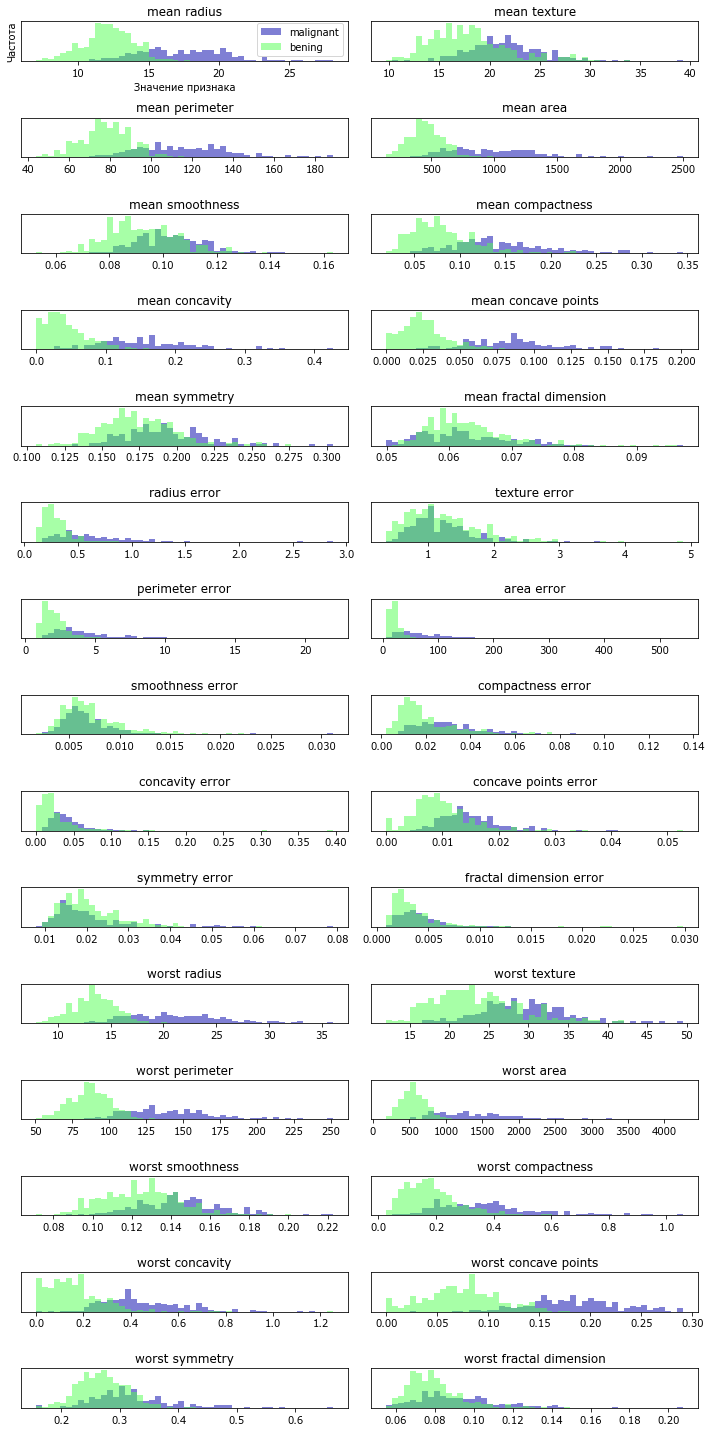

In [31]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
bening = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0),
              alpha=.5)
    ax[i].hist(bening[:, i], bins=bins, color=mglearn.cm3(2),
              alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Значение признака")
ax[0].set_ylabel("Частота")
ax[0].legend(["malignant", "bening"], loc="best")
fig.tight_layout()

In [32]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [33]:
from sklearn.decomposition import PCA
# оставляем первые две главные компоненты
pca = PCA(n_components=2)
# подгоняем модель РСА на наборе данных breast cancer
pca.fit(X_scaled)

# сокращаем размерность данных до двухглавных компонент
X_pca = pca.transform(X_scaled)
print("Форма исходного массива: {}".format(str(X_scaled.shape)))
print("Форма массива после сокращения размерности: {}".format(
       str(X_pca.shape)))

Форма исходного массива: (569, 30)
Форма массива после сокращения размерности: (569, 2)


Text(0, 0.5, 'Вторая главная компонента')

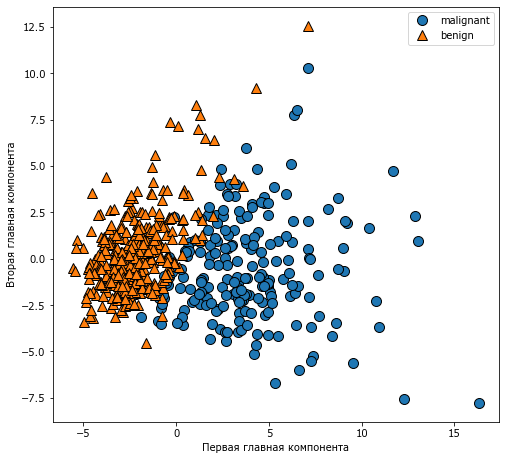

In [34]:
# строим график двух главных компонент, классы выделены цветом
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("Первая главная компонента")
plt.ylabel("Вторая главная компонента")

In [35]:
print("форма главных компонент: {}".format(pca.components_.shape))

форма главных компонент: (2, 30)


In [36]:
print("компоненты РСА:\n {}".format(pca.components_))

компоненты РСА:
 [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'Главные компоненты')

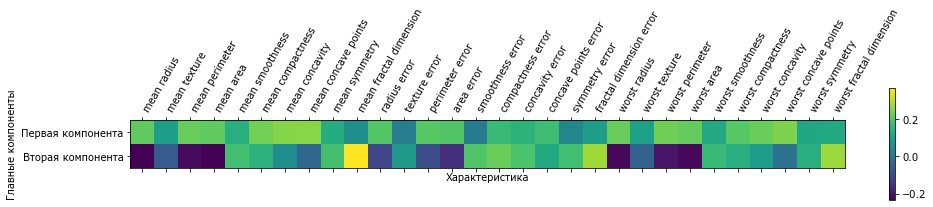

In [38]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["Первая компонента", "Вторая компонента"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), 
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Характеристика")
plt.ylabel("Главные компоненты")

### Метод "собственных лиц" (eigenfaces) для выделения характеристк